In [26]:
## Lets read some drone data

In [27]:
## First import general packages for running python analysis:
import os, h5py, datetime,pytz,pickle, yaml
import numpy as np
from matplotlib.pyplot import *
from matplotlib import pyplot as plt

## Then import the beamcals module packages and initialize 'gbosite' class:
from beamcals import corr, concat, drone, bicolog
import beamcals.plotting_utils as pu
import beamcals.fitting_utils as fu
import beamcals.geometry_utils as gu
import beamcals.time_utils as tu
from beamcals.sites import site
import beamcals.reduce_ccclass as rc
gbosite=site.site('../beamcals/beamcals/sites/GBO_config.npz')

In [28]:
fly = '618'

In [29]:
dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])


Initializing drone data via datcon_csv routine: FLY618.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 0/16406 non-nan values
    --> RTK Data not usable for this data file...
  --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-10-21 18:25:07.095000+00:00 2021-10-21 18:52:32.541000+00:00


plotting drone coordinates for all time samples:
overplotting drone coordinates for t_cut samples: [0:-1]


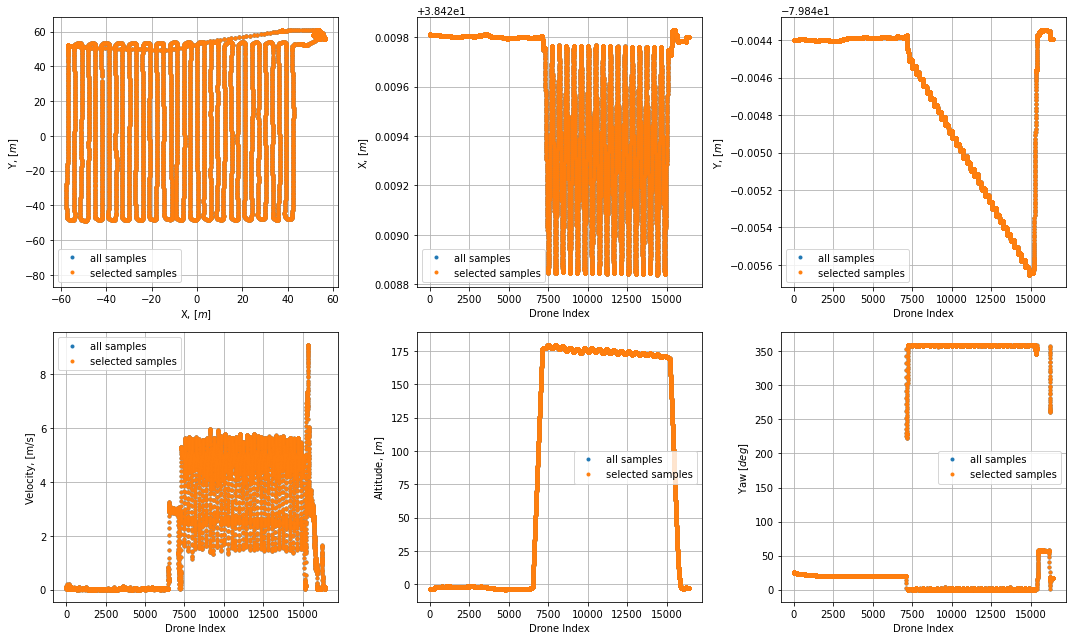

In [30]:
pu.Plot_Drone_Coordinates(dronetest0825,coo='xy')#,t_bounds=[tlb,tub])
#pu.Plot_Drone_Coordinates(dronetest0825,coo='xy',t_bounds=[2400,10200])

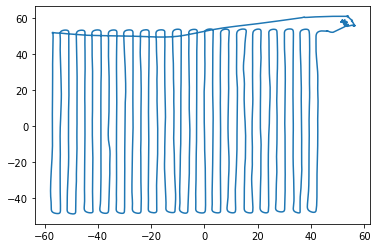

In [31]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m

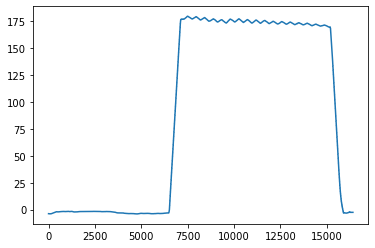

In [32]:
plt.plot(dronedat.coords_xyz_LC[:,2]) # height

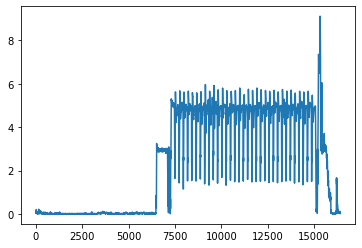

In [33]:
plt.plot(dronedat.velocity) # velocity

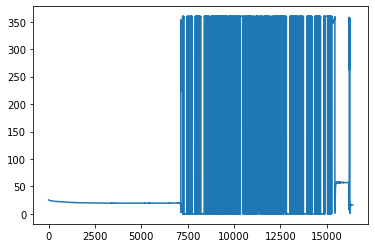

In [34]:
plt.plot(dronedat.yaw) # yaw angle



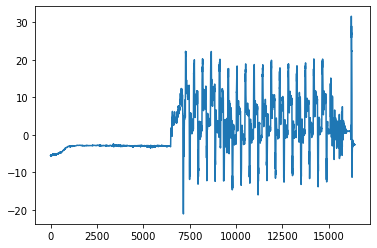

In [35]:
plt.plot(dronedat.pitch) # pitch angle

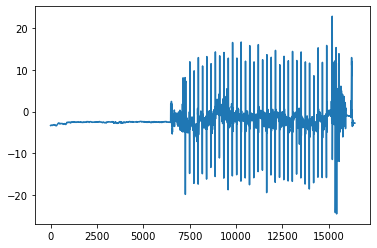

In [36]:
plt.plot(dronedat.roll) # roll angle

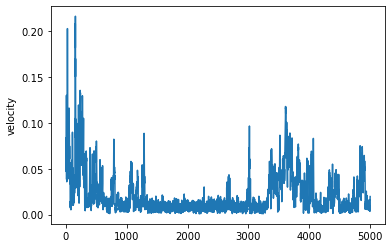

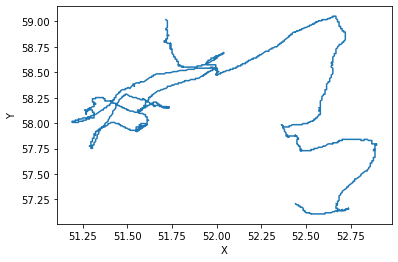

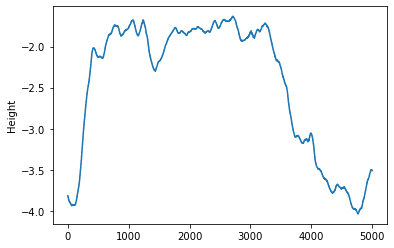

In [37]:
# Try to find start of flight
tlbs = 0
tubs = 5000

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

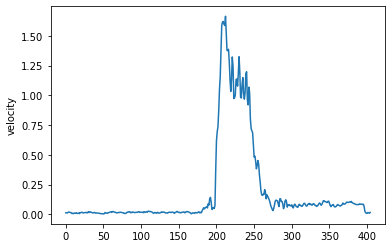

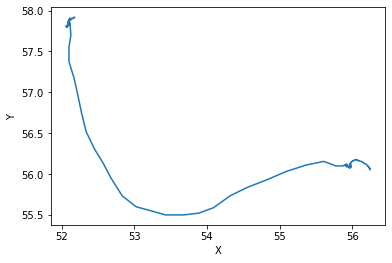

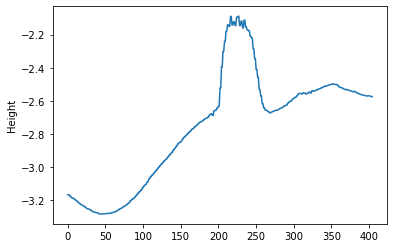

In [38]:
# Try to find end of flight -- this is probably them moving the drone to the right location
tlb = 16000
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

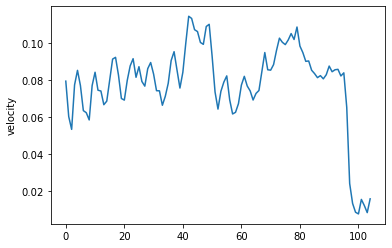

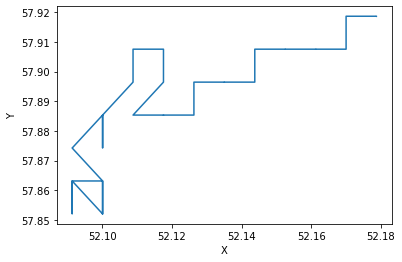

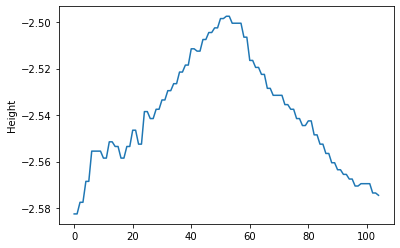

In [39]:
# Try to find end of flight -- this is probably them moving the drone to the right location
tlb = 16300
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

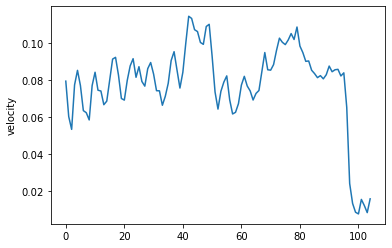

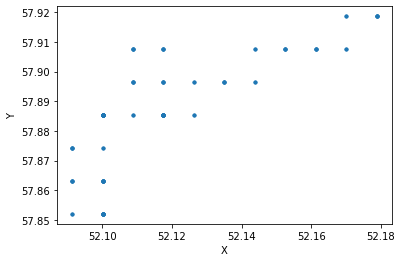

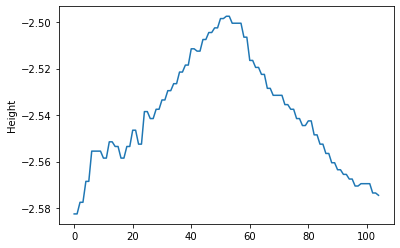

In [40]:
# Those X, Y stationary points --- are they repated values? That would skew the stddev calculation
tlb = 16300
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1],marker='.',linestyle='None') #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [42]:
## 

print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0]))
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1]))
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0]))
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1]))

51.92861408743503
58.151572679772556
52.118174246044056
57.88648881392803


In [44]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0]) - np.mean(dronedat.coords_xyz_LC[tlb:tub,0]))
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1]) - np.mean(dronedat.coords_xyz_LC[tlb:tub,1]))

-0.18956015860902653
0.2650838658445238


In [45]:
fly = '625'

dronedir='/hirax/all_drone_data/datcon_csv/'
dronedat=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronedat.t_arr_datetime[0], dronedat.t_arr_datetime[-1])

Initializing drone data via datcon_csv routine: FLY625.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 0/14495 non-nan values
    --> RTK Data not usable for this data file...
  --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-10-21 21:39:52.600000+00:00 2021-10-21 22:04:05.590000+00:00


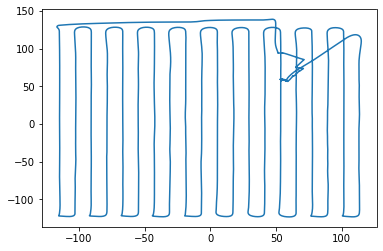

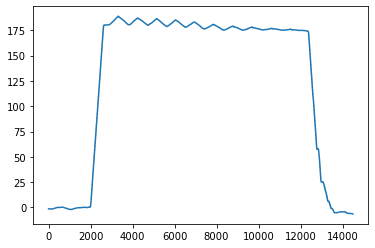

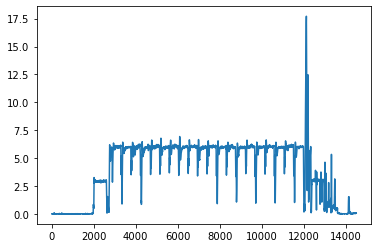

In [46]:
plt.plot(dronedat.coords_xyz_LC[:,0],dronedat.coords_xyz_LC[:,1]) #X, Y in m
plt.show()
plt.plot(dronedat.coords_xyz_LC[:,2]) # height
plt.show()
plt.plot(dronedat.velocity) # velocity
plt.show()

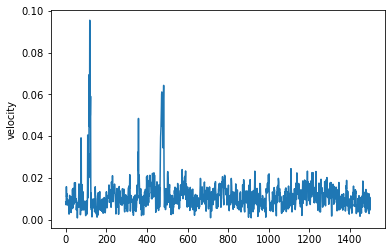

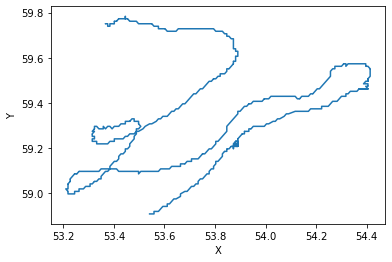

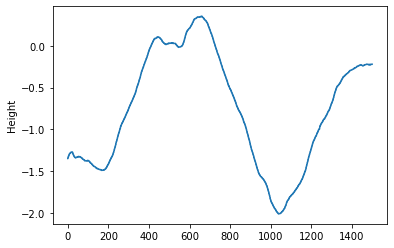

In [47]:
# Try to find start of flight
tlbs = 0
tubs = 1500

plt.plot(dronedat.velocity[tlbs:tubs]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,0],dronedat.coords_xyz_LC[tlbs:tubs,1]) #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlbs:tubs,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

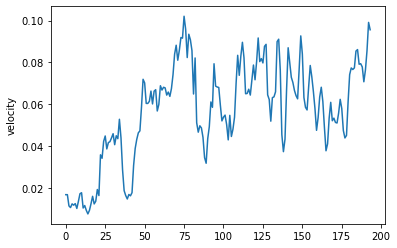

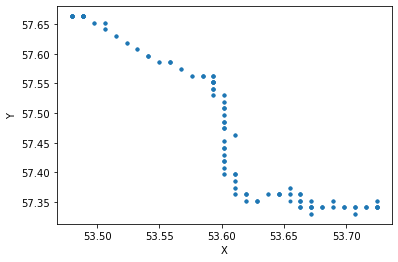

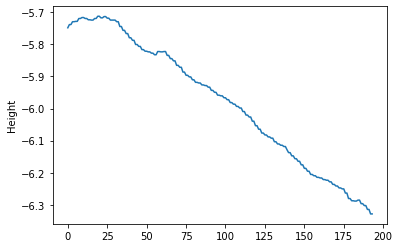

In [49]:
# Those X, Y stationary points --- are they repated values? That would skew the stddev calculation
tlb = 14300
tub = -1

plt.plot(dronedat.velocity[tlb:tub]) # velocity
plt.ylabel('velocity')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,0],dronedat.coords_xyz_LC[tlb:tub,1],marker='.',linestyle='None') #X, Y in m
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(dronedat.coords_xyz_LC[tlb:tub,2]) #X, Y in m
plt.ylabel('Height')
plt.show()

In [51]:
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0]))
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1]))
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,0]))
print(np.mean(dronedat.coords_xyz_LC[tlb:tub,1]))

print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,0]) - np.mean(dronedat.coords_xyz_LC[tlb:tub,0]))
print(np.mean(dronedat.coords_xyz_LC[tlbs:tubs,1]) - np.mean(dronedat.coords_xyz_LC[tlb:tub,1]))

53.747593407528406
59.361687315784
53.60759563208321
57.46709581158851
0.13999777544519532
1.8945915041954962
